In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

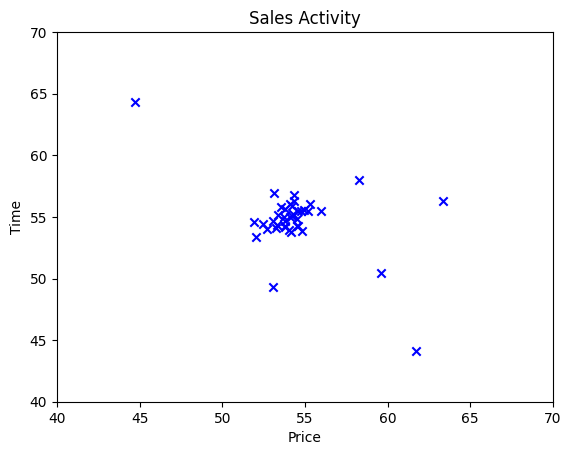

In [2]:
# Training data, used to fit a Gaussian distribution
X_train = np.array( [[53.81548, 54.17169],
 [54.31098, 56.25419],
 [53.53597, 55.77020],
 [54.80103, 53.81813],
 [53.77274, 54.64955],
 [53.76510, 55.02311],
 [54.05349, 53.93946],
 [55.30905, 56.04190],
 [53.15523, 56.92122],
 [52.69940, 53.99916],
 [54.36799, 56.75782],
 [53.26325, 54.09898],
 [51.91253, 54.61325],
 [53.37000, 55.18268],
 [54.15764, 53.77083],
 [55.99450, 55.45329],
 [54.96982, 55.59222],
 [54.75068, 55.46889],
 [53.33027, 54.34699],
 [53.05002, 54.68726],
 [53.77642, 54.23618],
 [55.17426, 55.50957],
 [54.21251, 55.08270],
 [53.82089, 55.61146],
 [54.12355, 54.95509],
 [54.54752, 54.85861],
 [54.09944, 56.03131],
 [54.57730, 54.25667],
 [54.52331, 54.23004],
 [54.30044, 55.26643],
 [54.55839, 55.48691],
 [54.22494, 55.86117],
 [52.04029, 53.34483],
 [53.07931, 49.34787],
 [61.72713, 44.12623],
 [52.47662, 54.45936],
 [59.58257, 50.41161],
 [63.33986, 56.29887],
 [58.26118, 57.97830],
 [44.75261, 64.35040]])

# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Set the title
plt.title("Sales Activity")
# Set the y-axis label
plt.ylabel('Time')
# Set the x-axis label
plt.xlabel('Price')
# Set axis range
plt.axis([40, 70, 40, 70])
plt.show()

In [10]:
def estimate_parameters(X):
    """
    Calculates mean and variance of all features
    in the dataset

    Args:
        X (ndarray): (m, n) Data matrix

    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape

    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)

    return mu, var

In [11]:
mu, var = estimate_parameters(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [54.38959275 54.80661075]
Variance of each feature: [7.5778417  7.33594621]


In [12]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
def gaussian_distribution(X, mu, var):
    """
    Computes the probability
    density function of the examples X under the multivariate gaussian
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """

    k = len(mu)

    if var.ndim == 1:
        var = np.diag(var)

    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))

    return p

p = gaussian_distribution(X_train, mu, var)
print(p)

[2.03208380e-02 1.84975797e-02 1.90965393e-02 1.97490428e-02
 2.07819102e-02 2.07375027e-02 2.01290908e-02 1.81938816e-02
 1.42330415e-02 1.69105879e-02 1.64668530e-02 1.89733198e-02
 1.42032164e-02 1.97398355e-02 1.97706515e-02 1.75037734e-02
 2.00171922e-02 2.05399750e-02 1.95393413e-02 1.89442121e-02
 2.03663703e-02 1.98175010e-02 2.11916322e-02 1.99929462e-02
 2.12147794e-02 2.13071107e-02 1.91650287e-02 2.08620722e-02
 2.08433125e-02 2.10296965e-02 2.06444604e-02 1.97525842e-02
 1.28207252e-02 2.50087949e-03 2.57028912e-07 1.66297608e-02
 9.65609657e-04 9.28721377e-05 3.99969495e-03 9.37374199e-08]


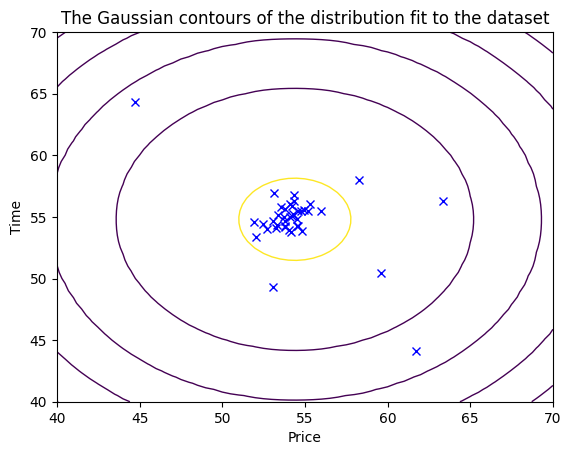

In [13]:
#Plotting code
def visualize_data(X, mu, var):
    """
    This visualization shows you the
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """

    X1, X2 = np.meshgrid(np.arange(40, 70.5, 0.5), np.arange(40, 70.5, 0.5))
    Z = gaussian_distribution(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)

    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Time')
    # Set the x-axis label
    plt.xlabel('Price')

visualize_data(X_train, mu, var)